# Обработанные данные

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/test_task_sber/test_task_sber/train_data_EDA.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test_task_sber/test_task_sber/test_data_EDA.csv')

In [4]:
test_data.head()

,id,title,text,filtered_text,filtered_title,lemmatized_title,lemmatized_text,title_tokens,text_tokens,total
0,0,Графики обслуживания внутриквартирного и внутр...,В соответствии с п.42 Постановления Правительс...,соответствии п.42 Постановления Правительства ...,Графики обслуживания внутриквартирного внутрид...,графика обслуживание внутриквартирный внутридо...,соответствие п.42 постановление правительство ...,"['графика', 'обслуживание', 'внутриквартирный'...","['соответствие', 'п.42', 'постановление', 'пра...",графика обслуживание внутриквартирный внутридо...
1,1,На МЦД улучшили поезда,"В Москве, на Белорусско-Савеловском центрально...",Москве Белорусско-Савеловском центральном диам...,МЦД улучшили поезда,мцд улучшить поезд,москва белорусско-савёловский центральный диам...,"['мцд', 'улучшить', 'поезд']","['москва', 'белорусско-савёловский', 'централь...",мцд улучшить поезд москва белорусско-савёловск...
2,2,Катастрофа SSJ 100: вина за гибель 41 человека...,Завершено расследование дела о крушении самоле...,Завершено расследование дела крушении самолета...,Катастрофа SSJ вина гибель человека возложена ...,катастрофа ssj вино гибель человек возложить п...,завершить расследование дело крушение самолёт ...,"['катастрофа', 'ssj', 'вино', 'гибель', 'челов...","['завершить', 'расследование', 'дело', 'крушен...",катастрофа ssj вино гибель человек возложить п...
3,3,С Днем юриста!,От души поздравляем сотрудников и преподавател...,души поздравляем сотрудников преподавателей ст...,Днем юриста,день юрист,душа поздравлять сотрудник преподаватель студе...,"['день', 'юрист']","['душа', 'поздравлять', 'сотрудник', 'преподав...",день юрист душа поздравлять сотрудник преподав...
4,4,"Охота на ""черного"" лесоруба","В Костроме прошел межрегиональный форум, посвя...",Костроме прошел межрегиональный форум посвящен...,Охота черного лесоруба,охота чёрный лесоруб,кострома пройти межрегиональный форум посвятит...,"['охота', 'чёрный', 'лесоруб']","['кострома', 'пройти', 'межрегиональный', 'фор...",охота чёрный лесоруб кострома пройти межрегион...


In [ ]:
train_data.head()

,sentence,label,filtered_sentence,lemmatized_sentence,tokens
0,Срыв сроков строительства зоопарка оценили в 1...,1,Срыв сроков строительства зоопарка оценили млр...,срыв срок строительство зоопарк оценить млрд р...,"['срыв', 'срок', 'строительство', 'зоопарк', '..."
1,"По данным Генпрокуратуры РФ, в 2014-2018 годах...",1,данным Генпрокуратуры РФ 2014-2018 годах выяви...,данные генпрокуратура рф 2014-2018 год выявить...,"['данные', 'генпрокуратура', 'рф', '2014-2018'..."
2,"Обвиняли в этом столичный акимат, который сорв...",1,Обвиняли столичный акимат который сорвал сроки...,обвинять столичный акимат который сорвать срок...,"['обвинять', 'столичный', 'акимат', 'который',..."
3,Запуск циклотронного центра ядерной медицины н...,1,Запуск циклотронного центра ядерной медицины б...,запуск циклотронный центр ядерный медицина баз...,"['запуск', 'циклотронный', 'центр', 'ядерный',..."
4,Сроки сдачи объекта несколько раз переносились.,1,Сроки сдачи объекта несколько переносились,срок сдача объект несколько переноситься,"['срок', 'сдача', 'объект', 'несколько', 'пере..."


# Обучение bert


## Bert

In [5]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [6]:
!pip install transformers

In [7]:
from transformers import BertTokenizer

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased', do_lower_case=False)

Loading BERT tokenizer...


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

In [39]:
sentences = train_data.filtered_sentence.values
labels = train_data.label.values

In [40]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Срыв сроков строительства зоопарка оценили млрд рублей Управление капстроительства намерено взыскать арбитраже млрд руб АО РЖДстрой качестве неустойки срыв срока сдачи первой очереди зоопарка
Tokenized:  ['Ср', '##ыв', 'сроков', 'строительства', 'зоопарка', 'оценили', 'млрд', 'рублей', 'Управление', 'капс', '##тр', '##ои', '##тель', '##ства', 'намерено', 'взыскать', 'арбитраж', '##е', 'млрд', 'руб', 'АО', 'РЖД', '##строй', 'качестве', 'неуст', '##ойки', 'срыв', 'срока', 'сдачи', 'первой', 'очереди', 'зоопарка']
Token IDs:  [65408, 2572, 38243, 13508, 46501, 35836, 17789, 8221, 25237, 41817, 16799, 15484, 19724, 2924, 38506, 56594, 28940, 842, 17789, 9904, 22559, 31041, 13454, 6620, 29538, 75127, 32766, 20929, 40974, 8909, 29325, 46501]


In [41]:
max_len = 0
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  111


In [42]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  Срыв сроков строительства зоопарка оценили млрд рублей Управление капстроительства намерено взыскать арбитраже млрд руб АО РЖДстрой качестве неустойки срыв срока сдачи первой очереди зоопарка
Token IDs: tensor([  101, 65408,  2572, 38243, 13508, 46501, 35836, 17789,  8221, 25237,
        41817, 16799, 15484, 19724,  2924, 38506, 56594, 28940,   842, 17789,
         9904, 22559, 31041, 13454,  6620, 29538, 75127, 32766, 20929, 40974,
         8909, 29325, 46501,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [43]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

1,502 training samples
  167 validation samples


In [44]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [45]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [46]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (119547, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              

In [47]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [48]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs =

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

SyntaxError: ignored

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import numpy as np
# Function to calculate the accuracy of our predictions vs labels
def flat_statistic(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    precision = precision_score(labels_flat, pred_flat)
    acc = np.sum(pred_flat == labels_flat) / len(labels_flat)
    recall = recall_score(labels_flat, pred_flat)
    f1 = f1_score(labels_flat, pred_flat)
    return acc, recall, precision, f1

In [50]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [51]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward`
        # function and pass down the arguments. The `forward` function is
        # documented here:
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids,
                       token_type_ids=None,
                       attention_mask=b_input_mask,
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    total_eval_f1 = 0
    total_eval_recall = 0
    total_eval_precision = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the
        # output values prior to applying an activation function like the
        # softmax.
        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        eval_accuracy, eval_recall, eval_precision, eval_f1 = flat_statistic(logits, label_ids)

        total_eval_accuracy += eval_accuracy
        total_eval_recall += eval_recall
        total_eval_precision += eval_precision
        total_eval_f1 += eval_f1

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    avg_val_f1 = total_eval_f1 / len(validation_dataloader)
    avg_val_precision = total_eval_precision / len(validation_dataloader)
    avg_val_recall = total_eval_recall / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Valid. F1': avg_val_f1,
            'Valid. Recall': avg_val_recall,
            'Valid. Precision.': avg_val_precision,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of     47.    Elapsed: 0:00:14.

  Average training loss: 0.45
  Training epcoh took: 0:00:16

Running Validation...
  Accuracy: 0.93
  Validation Loss: 0.28
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...
  Batch    40  of     47.    Elapsed: 0:00:14.

  Average training loss: 0.25
  Training epcoh took: 0:00:16

Running Validation...
  Accuracy: 0.91
  Validation Loss: 0.25
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...
  Batch    40  of     47.    Elapsed: 0:00:14.

  Average training loss: 0.18
  Training epcoh took: 0:00:17

Running Validation...
  Accuracy: 0.93
  Validation Loss: 0.25
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...
  Batch    40  of     47.    Elapsed: 0:00:14.

  Average training loss: 0.10
  Training epcoh took: 0:00:17

Running Validation...
  Accuracy: 0.93
  Validation Loss: 0.23
  Validation took: 0:00:01

Training complete!
Total tr

In [52]:
import pandas as pd

# Display floats with two decimal places.
#pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Valid. F1,Valid. Recall,Valid. Precision.,Training Time,Validation Time
epoch,,,,,,,,
1,0.452560,0.283082,0.927083,0.812134,0.778950,0.853505,0:00:16,0:00:01
2,0.253607,0.246353,0.906250,0.766102,0.724838,0.824405,0:00:16,0:00:01
3,0.175892,0.251443,0.932292,0.841711,0.895563,0.799663,0:00:17,0:00:01
4,0.100602,0.234183,0.932292,0.823163,0.799784,0.855820,0:00:17,0:00:01


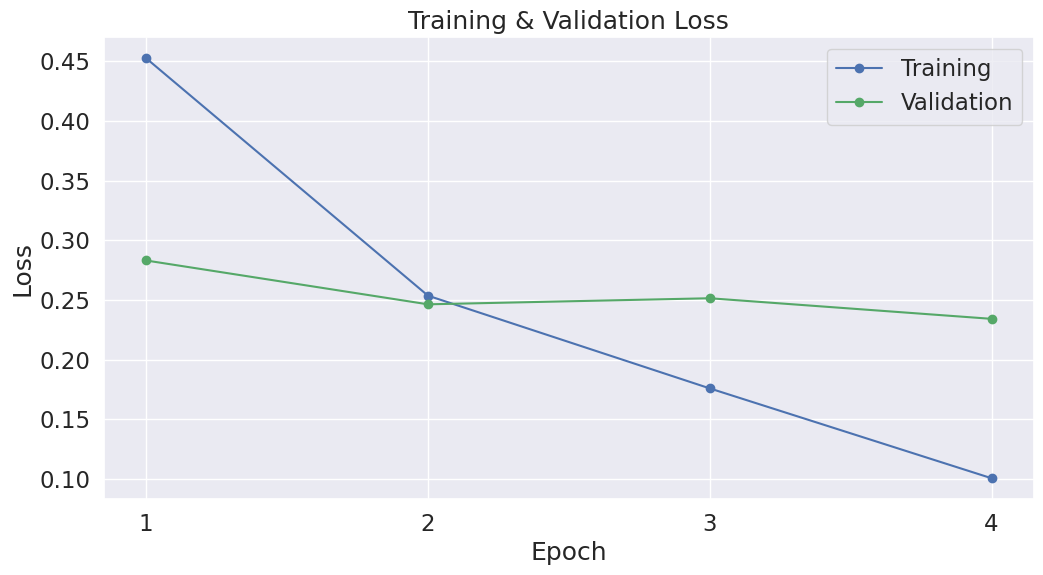

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

# Вывод 🍒


Лучшие результаты на валидационной выборке: \\
f1-score -- **84 %** \\
accuracy -- **93 %** \\

Результаты получены на обработанных данных без лемматизации. Применение лемматизации ухудшело результат.